In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Library
imgs = [
  "fig/rice.png",
  "fig/checkerboard.png"
]

def readi(index):
  name = imgs[index]
  img = cv2.imread(name)
  return img

def imgu8(img):
  if img.dtype != np.uint8:
    img = img * 255
    img[img > 255] = 255
  return np.uint8(img)

def imgfloat(img):
  if img.dtype == np.uint8:
    return np.float32(img)/255
  else:
    return np.float32(img)

def show(figname, img):
  if(img.dtype != np.uint8):
    img = imgu8(img)
  cv2.imshow(figname, img)
  key = cv2.waitKey(0)
  if key == 115: # Key 's'
    cv2.imwrite("fig/"+figname.replace(' ', '_')+".png", img)
  cv2.destroyAllWindows()

def gray2bgr(img):
  return cv2.merge((img, img, img))


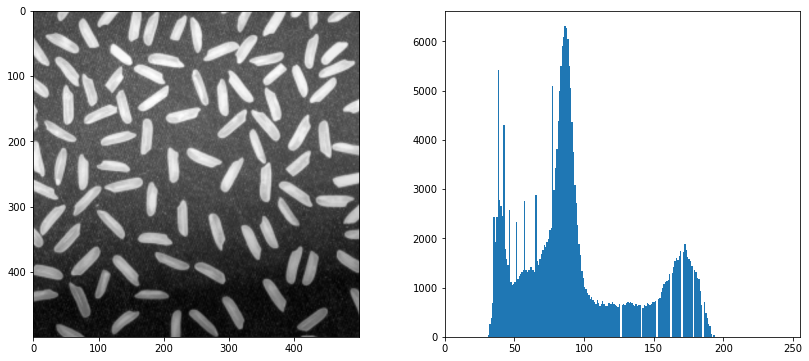

In [5]:
rice = cv2.imread(imgs[0], flags=cv2.IMREAD_GRAYSCALE)
# rice = cv2.equalizeHist(rice)
# rice = cv2.medianBlur(rice, 3)
# Rice
plt.rcParams["figure.figsize"] = (14, 6)
plt.set_cmap("gray")

plt.subplot(1,2,1)
plt.imshow(rice)

plt.subplot(1,2,2)
plt.hist(rice.ravel(), 255, [0,255])
plt.xlim([0,255])
plt.show()

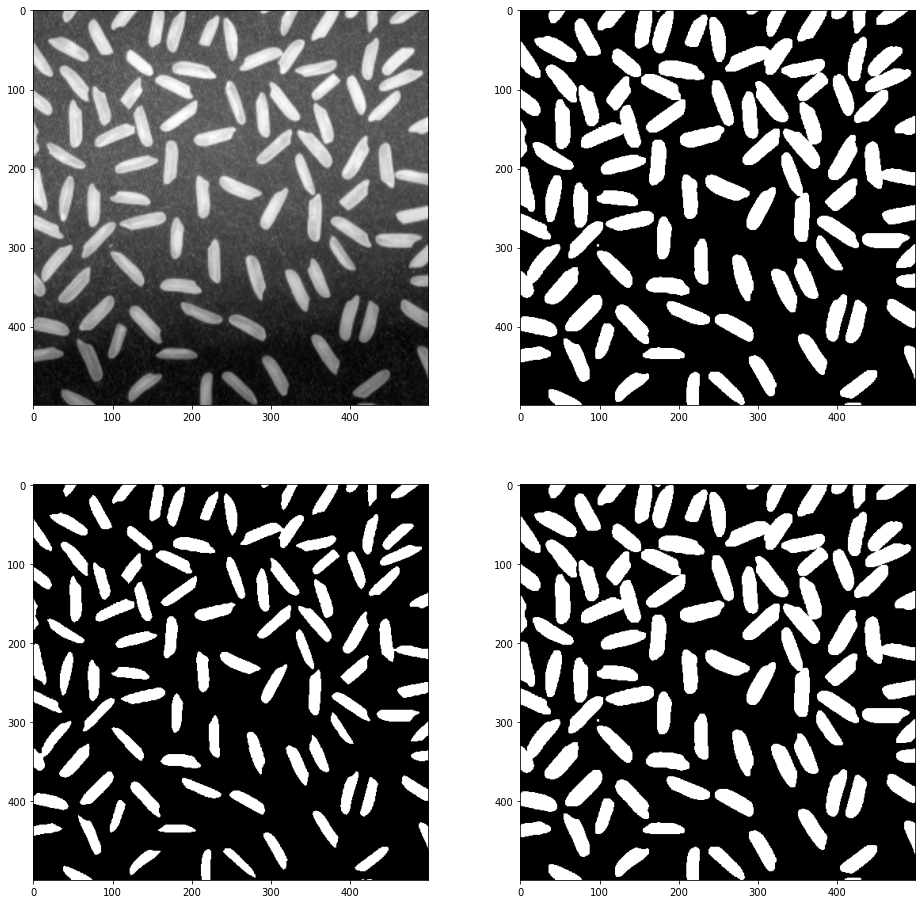

In [6]:
plt.rcParams["figure.figsize"] = (16, 16)
threshold1 = 120
threshold2 = 160
eqd = cv2.equalizeHist(rice)
ret, top = cv2.threshold(rice, threshold1, 255, type=cv2.THRESH_BINARY)
ret, btm = cv2.threshold(eqd, threshold2, 255, type=cv2.THRESH_BINARY)
res = np.vstack([top[:top.shape[0]//3*2, :], btm[btm.shape[0]//3*2:, :]])

kernel = np.ones((3,3), dtype=np.uint8)
erd = cv2.erode(res, kernel ,iterations=1)
dlt = cv2.dilate(res, kernel, iterations=1)

open_op = cv2.dilate(erd, kernel)
close_op = cv2.erode(dlt, kernel)

cv2.imwrite("fig/raw.png", rice)
cv2.imwrite("fig/bin.png", res)
cv2.imwrite("fig/erd.png", erd)
cv2.imwrite("fig/dlt.png", dlt)
cv2.imwrite("fig/open.png", open_op)
cv2.imwrite("fig/close.png", close_op)

plt.subplot(2,2,1)
plt.imshow(rice)

plt.subplot(2,2,2)
plt.imshow(dlt)

plt.subplot(2,2,3)
plt.imshow(cv2.erode(res, kernel))

plt.subplot(2,2,4)
plt.imshow(cv2.dilate(res, kernel))

plt.show()

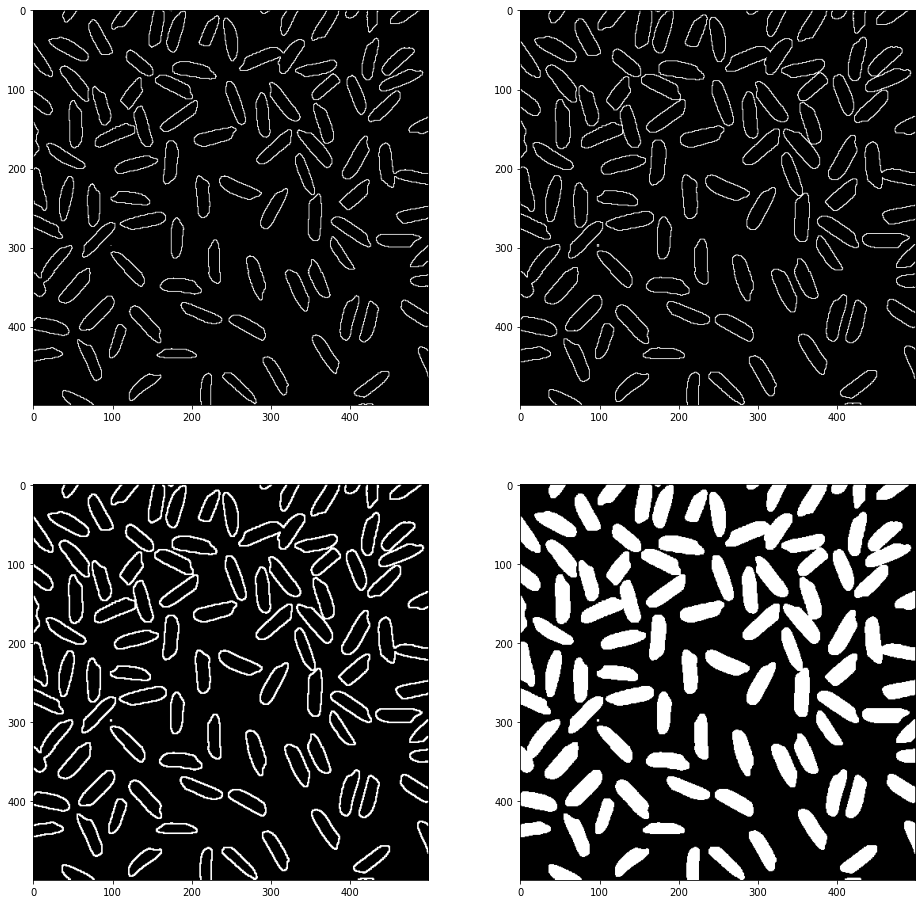

In [23]:
mor_fill_kernel = np.array([
  [0,1,0],
  [1,1,1],
  [0,1,0]
], dtype=np.uint8)
def mor_fill(edge: np.ndarray, seed_pos: tuple) -> np.ndarray:
  """
  edge is white edge with black background
  """
  A = np.uint8(edge)
  A_c = 255 - A
  prex = np.zeros_like(edge, dtype=np.uint8)
  prex[seed_pos[0], seed_pos[1]] = 255
  while True:
    x = cv2.dilate(prex, mor_fill_kernel) & A_c
    if np.array_equal(x, prex):
      break
    prex = x
  return 255 - prex


kernel = np.ones((3,3), dtype=np.uint8)

erd = cv2.erode(res, kernel ,iterations=1)
dlt = cv2.dilate(res, kernel, iterations=1)
internal_edge = res ^ erd
external_edge = res ^ dlt
edge = internal_edge | external_edge

cv2.imwrite("fig/internal_edge.png", internal_edge)
cv2.imwrite("fig/external_edge.png", external_edge)
cv2.imwrite("fig/mor_edge.png", edge)


fill_kernel = np.array([
  [0,1,0],
  [1,1,1],
  [0,1,0]
], dtype=np.uint8)

x = mor_fill(edge, (5,5))
# A_c = edge
# A = 255 - A_c

# A = np.uint8(A)
# prex = np.zeros_like(A, dtype=np.uint8)
# # Set seed
# prex[5,5] = 255

# while True:
#   x = np.array(cv2.dilate(prex, fill_kernel) & A)
#   cv2.imshow("fill", 255-x)
#   key = cv2.waitKey(10)
#   if key == 32:
#     break
#   if np.array_equiv(x, prex):
#     break
#   prex = x

cv2.imwrite("fig/fill.png", 255-x)

cv2.destroyAllWindows()

plt.subplot(2,2,1)
plt.imshow(internal_edge)

plt.subplot(2,2,2)
plt.imshow(external_edge)

plt.subplot(2,2,3)
plt.imshow(edge)

plt.subplot(2,2,4)
plt.imshow(x)

plt.show()

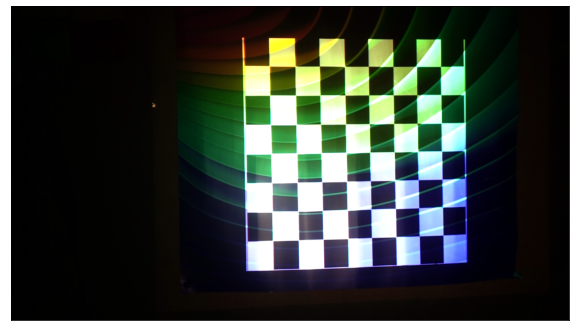

In [26]:
plt.rcParams["figure.figsize"] = (10, 20)
checker = readi(1)
plt.imshow(checker)
plt.xticks([])
plt.yticks([])
plt.show()

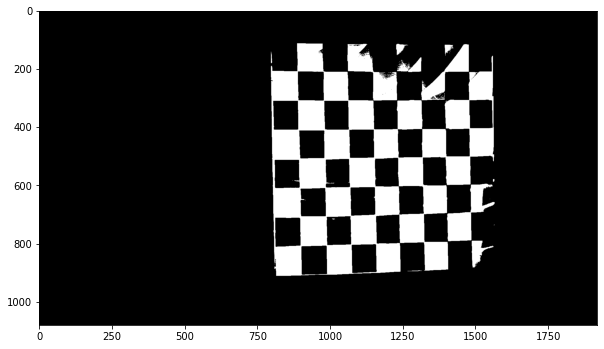

In [111]:
checker = readi(1)
gray = cv2.cvtColor(checker, cv2.COLOR_BGR2GRAY)
gray[gray > 180] = 255
gray[gray <= 180] = 0
x1 = np.max(gray, )

plt.imshow(gray)
plt.show()

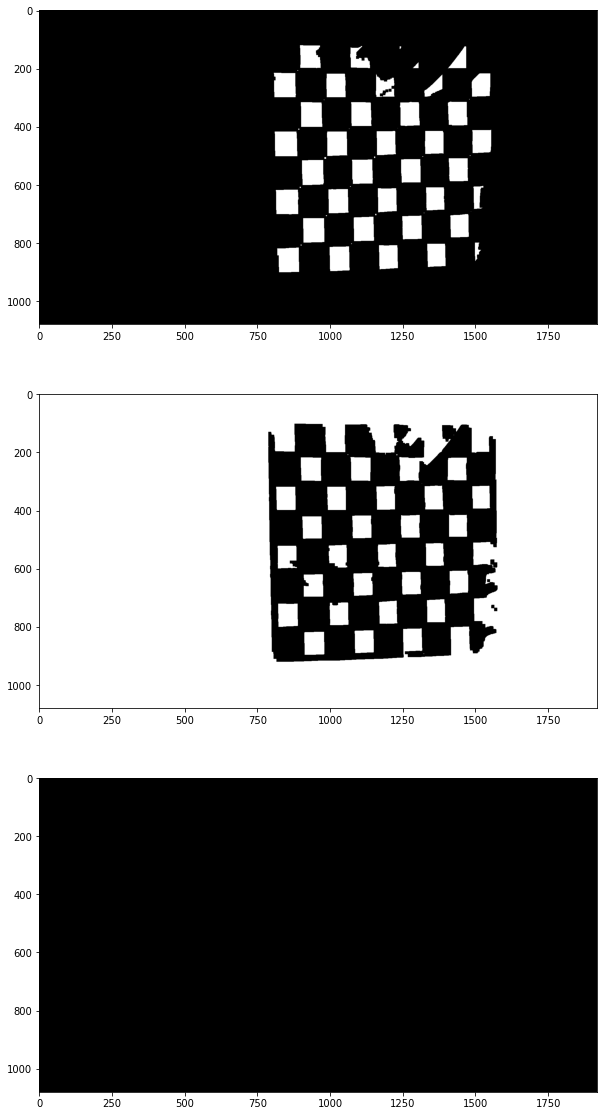

In [132]:
black_block = np.zeros((10,10), dtype=np.uint8)
white_block = np.ones((10,10), dtype=np.uint8) * 255
top_half = np.hstack([black_block, white_block])
btm_half = np.hstack([white_block, black_block])
kernel1 = np.vstack([top_half, btm_half])
res1 = cv2.erode(gray, kernel1, iterations=1)
res2 = cv2.erode(255 - gray, 255-kernel1)

plt.subplot(3,1,1)
plt.imshow(res1)
plt.subplot(3,1,2)
plt.imshow(res2)
plt.subplot(3,1,3)
plt.imshow(res1 & res2)
plt.show()

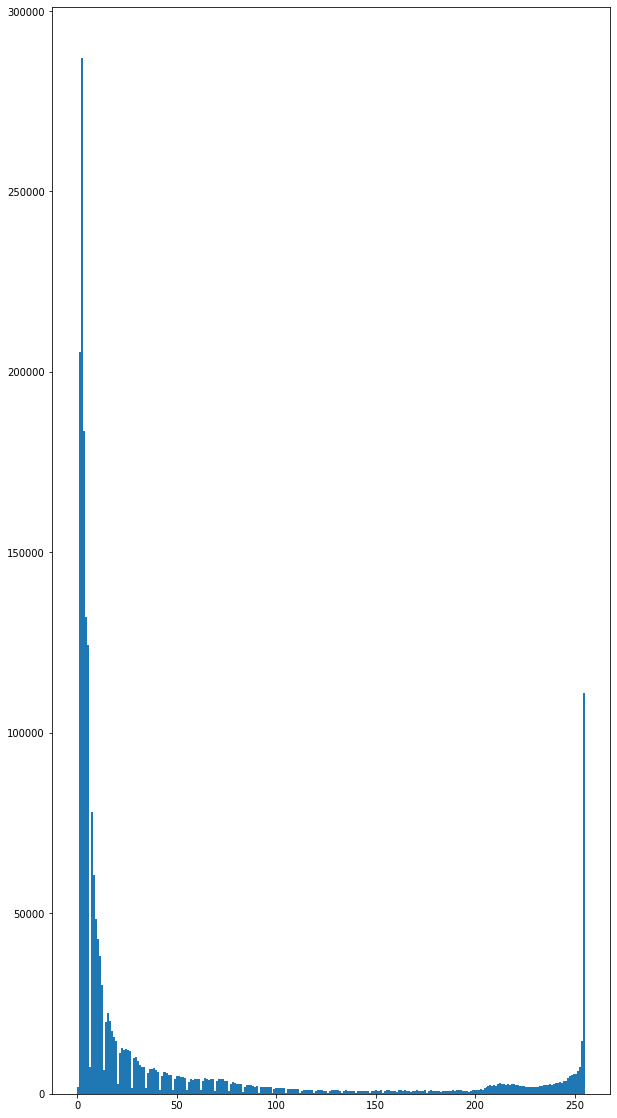

In [81]:
plt.hist(gray.ravel(), 256, [0,255])
plt.show()

In [9]:
cv2.destroyAllWindows()

In [17]:
m1 = np.array([
  [0,0],
  [0,0]
], dtype=np.uint8)

m2 = np.array([
  [0,0],
  [0,0]
], dtype=np.uint8)
print(np.array_equal(m1, m2))

True


In [25]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight